# Домашняя работа №7.

* Написать модель Random Forest на датасет больных сердечными болезнями (можно почистить от выбросов).

In [1]:
import pandas as pd

In [2]:
url = "http://yustiks.ru/dataset/cardio_train.csv"
data = pd.read_csv(url,sep=";")
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


Данный датасет разобран в начале лекции 5. 

Модель Random Forest при обучении дает такой метод как feature importance, используя его, можно оценить, какой параметр **максимально** влияет на болезнь.

* Сделать вывод о том, какой атрибут оказывает значительное влияение на наличие или отсутствие болезни.

Основная задача: определить, что влияет на сердечную болезнь больше всего. Например, выдвигая гипотезу о том, что тот кто курит, болеет чаще, мы сравниваем курящих пациентов с некурящими, и определяя насколько статистически значимы выборки, делаем вывод, что одна выборка статистически отличима от другой (или неотличима).
    Выдвигаем гипотезу на самый важный атрибут, полученный из feature_importance (Random_Forest). И оцениваем гипотезу. И делаем вывод.

In [3]:
from sklearn.model_selection import train_test_split
X = data.drop(['cardio'], axis=1)
Y = data['cardio']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [4]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

RandomForestClassifier()

In [5]:
from sklearn.metrics import classification_report
model_pred = model.predict(x_test)
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73     10531
           1       0.73      0.70      0.72     10469

    accuracy                           0.73     21000
   macro avg       0.73      0.72      0.72     21000
weighted avg       0.73      0.73      0.72     21000



In [6]:
features = pd.Series(model.feature_importances_, index=data.iloc[:,1:].columns.values).sort_values(ascending=False)
features

gender         0.217809
age            0.181269
ap_lo          0.166767
ap_hi          0.134884
weight         0.119606
cholesterol    0.086104
gluc           0.037266
smoke          0.015347
height         0.014748
cardio         0.011671
alco           0.007833
active         0.006696
dtype: float64

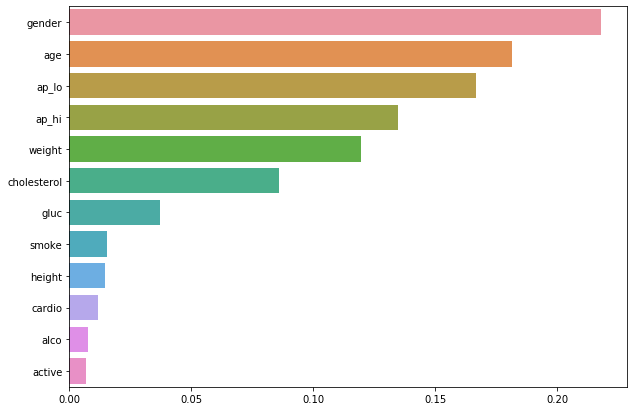

In [7]:
from matplotlib import rcParams
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = [10, 7]
import seaborn as sns
sns.barplot(x=features, y=features.index)
plt.show()

In [8]:
import researchpy as rp
descriptives, result = rp.ttest(data.gender, data.cardio)
print(descriptives)
print('________________________________________________________________________')
print(result)

   Variable         N      Mean        SD        SE  95% Conf.  Interval
0    gender   70000.0  1.349571  0.476838  0.001802   1.346039  1.353104
1    cardio   70000.0  0.499700  0.500003  0.001890   0.495996  0.503404
2  combined  140000.0  0.924636  0.647502  0.001731   0.921244  0.928028
________________________________________________________________________
                Independent t-test      results
0  Difference (gender - cardio) =        0.8499
1            Degrees of freedom =   139998.0000
2                             t =      325.4401
3         Two side test p value =        0.0000
4        Difference < 0 p value =        1.0000
5        Difference > 0 p value =        0.0000
6                     Cohen's d =        1.7396
7                     Hedge's g =        1.7395
8                 Glass's delta =        1.7823
9                             r =        0.6563


In [9]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [11]:
from sklearn import preprocessing

In [12]:
scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled_data = scale.fit_transform(data)
data_normed = pd.DataFrame(scaled_data, columns=data.columns.values)

In [77]:
# Проверим Влияние ТОП-2 факторов "пол" и "возраст" на нличие болезни 
import numpy as np
import math
print('Медиана:', data.age.median()/365)
old = data[data.age <= 54*365].cardio
adult = data[data.age > 54*365].cardio
M1 = old.mean()
M2 = adult.mean()
S1 = sum(old)
S2 = sum(adult)
S1sq = S1**2
S2sq = S2**2
Sq1 = sum(np.square(old))
Sq2 = sum(np.square(adult))

t = (M2 - M1)/math.sqrt((Sq1-S1sq/len(old))+(Sq2-S2sq/len(adult))/(len(old)+len(adult)-2)*(1/len(old) + 1/len(adult)))
round(t, 4)

Медиана: 53.98082191780822


0.0021

In [57]:
descriptive, result = rp.ttest(adult, old)
print(descriptive)
print('________________________________________________________________________')
print(result)
print("Имеется значительная разница между данными выбрками")

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0    cardio  34837.0  0.596435  0.490619  0.002629   0.591283  0.601587
1    cardio  35163.0  0.403862  0.490677  0.002617   0.398733  0.408991
2  combined  70000.0  0.499700  0.500003  0.001890   0.495996  0.503404
________________________________________________________________________
                Independent t-test     results
0  Difference (cardio - cardio) =       0.1926
1            Degrees of freedom =   69998.0000
2                             t =      51.9205
3         Two side test p value =       0.0000
4        Difference < 0 p value =       1.0000
5        Difference > 0 p value =       0.0000
6                     Cohen's d =       0.3925
7                     Hedge's g =       0.3925
8                 Glass's delta =       0.3925
9                             r =       0.1926


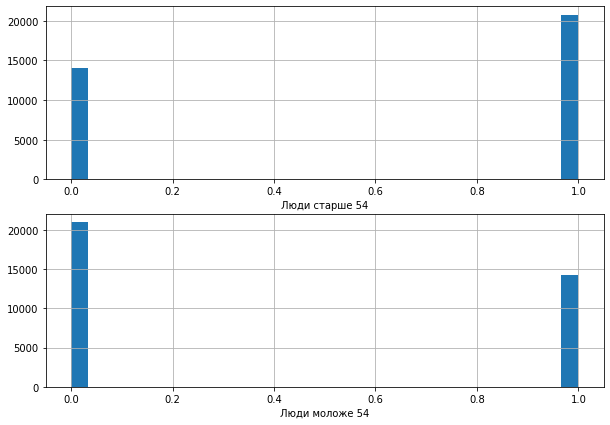

In [52]:
fig_, (ax_1, ax_2) = plt.subplots(2, 1)
ax_1.hist(data[data.age > 54*365].cardio, 30)
ax_1.grid()
ax_2.hist(data[data.age <= 54*365].cardio, 30)
ax_2.grid()
ax_1.set_xlabel('Люди старше 54')
ax_2.set_xlabel('Люди моложе 54')
plt.show()
print("Имеется значительная разница между данными выбрками")
print('Исходя и данных на графике, люди моложе медианного значения в 54 года - болеют реже')

In [80]:
old_men = data.loc[(data.age > 54*365) & (data.gender==1) ].cardio
old_women = data.loc[(data.age > 54*365) & (data.gender==2) ].cardio
adult_men = data.loc[(data.age <= 54*365) & (data.gender==1)].cardio
adult_women = data.loc[(data.age <= 54*365) & (data.gender==2)].cardio

In [89]:
descriptive1, result1 = rp.ttest(old_men, old_women)
print(descriptive1)
print('________________________________________________________________________')
print(result1)
print('Имеется разница между двумя выборками')

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0    cardio  22986.0  0.599800  0.489949  0.003232   0.593466  0.606134
1    cardio  11851.0  0.589908  0.491871  0.004518   0.581051  0.598765
2  combined  34837.0  0.596435  0.490619  0.002629   0.591283  0.601587
________________________________________________________________________
                Independent t-test     results
0  Difference (cardio - cardio) =       0.0099
1            Degrees of freedom =   34835.0000
2                             t =       1.7829
3         Two side test p value =       0.0746
4        Difference < 0 p value =       0.9627
5        Difference > 0 p value =       0.0373
6                     Cohen's d =       0.0202
7                     Hedge's g =       0.0202
8                 Glass's delta =       0.0202
9                             r =       0.0096
Имеется разница между двумя выборками


Относительно количество мужчин в группе старых и больных
0.5997998781867223
Относительно количество мужчин в группе взрослых и больных
0.39163413768630234
Относительно количество женщин в группе старых и больных
0.589908024639271
Относительно количество женщин в группе взрослых и больных
0.4257072668198748


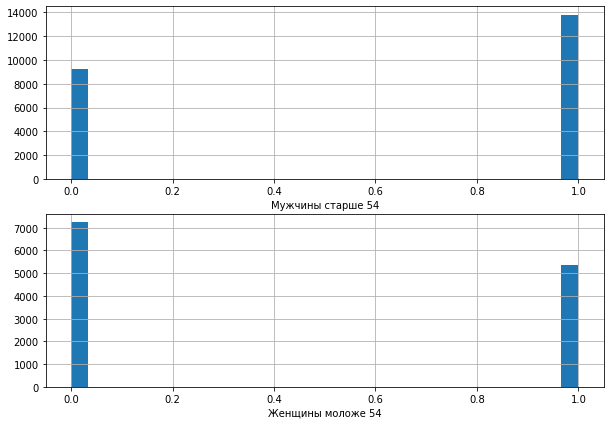

In [85]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.hist(old_men, 30)
ax1.set_xlabel('Мужчины старше 54')
ax2.hist(adult_women, 30)
ax2.set_xlabel('Женщины моложе 54')
ax1.grid()
ax2.grid()

print("Относительно количество мужчин в группе старых и больных")
print(old_men.sum()/old_men.count())
print("Относительно количество мужчин в группе взрослых и больных")
print(adult_men.sum()/adult_men.count())
print("Относительно количество женщин в группе старых и больных")
print(old_women.sum()/old_women.count())
print("Относительно количество женщин в группе взрослых и больных")
print(adult_women.sum()/adult_women.count())
plt.show()
# Как мы можем наблюдать, принадлежность к мужчинам или женщинам не столь значительно отражает влияние на наличие болезни
# В то же время фактор возраста, который модель поставила на вторрое место по значимости, оказывает более значительное влияние
# на наличие болезни